## Task 01

1. Considera un modelo de regresión lineal con dos características, X₁ y X₂, y sus pesos correspondientes w₁ y
w₂. Si el modelo predice una salida y mediante la ecuación y = 2w₁X₁ + 3w₂X₂ + 1, ¿cuál es la interpretación
del coeficiente 3w₂ en el contexto del modelo?

Representa el coeficiente de regresión sin estandarizar, el cual se calcula siguiendo el método de los mínimos cuadrados ordinarios y hay uno de dichos coeficientes para cada variable independiente.
Es el cambio estimado en unidades de "y" que se deriva del incremento de X₂ (variable independiente) cuando X₁ se mantiene constante.

https://physiostats.com/regresion-lineal-interpretacion-coeficientes/

2. Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la
multicolinealidad a la interpretación de los coeficientes de regresión individuales?

La multicolinealidad en la regresión lineal ocurre cuando las variables que se usan para predecir están muy conectadas. Esto causa resultados extraños en las interpretaciones y reduce la precisión de los coeficientes. También dificulta la identificación de variables importantes y puede conducir a problemas numéricos. (Sevilla, A. 2019)

https://economipedia.com/definiciones/multicolinealidad.html

## Task 02

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Cargar el conjunto de datos desde el archivo CSV
file_path = 'dataset_phishing.csv'
df = pd.read_csv(file_path)

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

print(type(X))
print(type(y))

ParserError: Error tokenizing data. C error: Expected 1 fields in line 493, saw 2


In [ ]:
dummies = pd.get_dummies(y)
concatenado = pd.concat([y, dummies], axis=1)
concatenado = concatenado.drop(['status', "legitimate"], axis=1)
y = concatenado
    

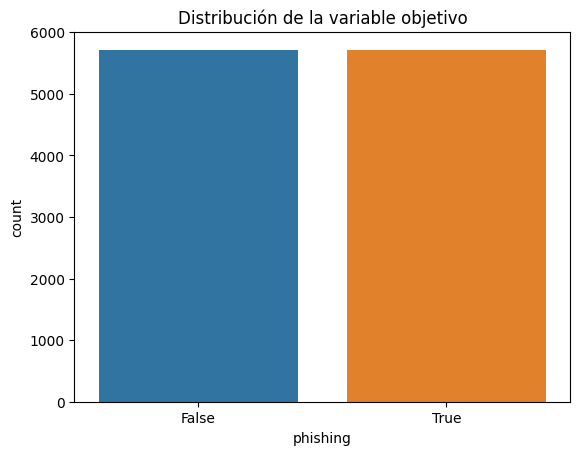

In [ ]:
# Revisar si el dataset está balanceado
sns.countplot(x='phishing', data=y)
plt.title('Distribución de la variable objetivo')
plt.show()

In [ ]:
X = X.values
y = y.values
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split
#X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_entreno, X_temp, y_entreno, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
X_prueba, X_check, y_prueba, y_check = train_test_split(X_temp, y_temp, test_size = 0.33, random_state = 1)

In [ ]:
print(X_entreno)
print(X_prueba)
print(X_check)
print(y_entreno)
print(y_prueba)
print(y_check)

[[29. 22.  0. ...  0.  1.  5.]
 [18. 10.  0. ...  0.  0.  0.]
 [40. 13.  0. ...  0.  1.  5.]
 ...
 [40. 31.  1. ...  0.  1.  5.]
 [43. 15.  0. ...  0.  0. 10.]
 [60. 28.  0. ...  0.  0.  4.]]
[[30. 21.  0. ...  0.  1.  5.]
 [77. 27.  1. ...  0.  1.  0.]
 [56. 18.  0. ...  0.  0.  5.]
 ...
 [50. 15.  0. ...  0.  0.  6.]
 [39. 31.  0. ...  0.  1.  1.]
 [33. 25.  0. ...  0.  1.  0.]]
[[ 32.  23.   0. ...   0.   0.   3.]
 [ 49.  17.   0. ...   0.   0.   5.]
 [107.  19.   1. ...   0.   1.   0.]
 ...
 [ 38.  17.   0. ...   0.   0.   4.]
 [ 48.  28.   0. ...   0.   1.   0.]
 [ 31.  22.   0. ...   0.   0.   3.]]
[[ True]
 [ True]
 [False]
 ...
 [ True]
 [False]
 [False]]
[[ True]
 [ True]
 [False]
 ...
 [False]
 [ True]
 [ True]]
[[False]
 [False]
 [ True]
 ...
 [False]
 [ True]
 [False]]


- Recuerde definir de forma clara y razonada (es decir, diga el por qué de su elección) de una métrica de
desempeño principal

### Regresion Logistica - implementacion

### Regresión Logística - Librerias

In [ ]:
# Entrenamiento del modelo
from sklearn.linear_model import LogisticRegression
regresor = LogisticRegression()
regresor.fit(X_entreno, y_entreno)

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = regresor.predict(X_prueba)
print(y_pred)

[False  True False ... False False  True]


In [ ]:
print(len(y_pred))

2297


In [ ]:
print(len(y_entreno))

8001


In [ ]:
print(len(X_entreno))

8001


ValueError: x and y must be the same size

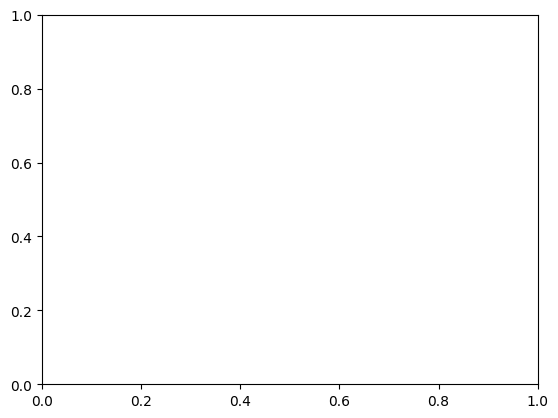

In [ ]:
plt.scatter(X_entreno, y_entreno, color = 'red')
plt.plot(X_entreno, regresor.predict(X_entreno), color = 'blue')
plt.title('Salario vs Experiencia (Conjunto de entrenamiento)')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()